# Test 5 - Random-think and gameplay logging

In [23]:
! tar czf Testing.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random
import math

In [3]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Instance variables

In [9]:
levels = {"coin_collector": 17, "cooking": 9, "treasure_hunter": 29}
seeds = range(1,11)
n_think_indices = [0, 10, "r5"]
n_episodes = 1
max_steps = 100

# Game generation

Better to reuse already generated games.

# Log generation

In [ ]:
game = "treasure_hunter"
level = 13

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

In [ ]:
game = "cooking"
level = 1

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

In [ ]:
game = "coin_collector"
level = 6

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

# Game running - random-think on the first 9 levels of all three games

In [ ]:
for game in levels.keys():
    for level in range(1, 10):
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                                                verbose=False, log=f"logs/{game}/randomthink_level{level}-seed{seed}.log"),
                           f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Testing 4/randomthink_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
            print("Data pickled.")
            f.close()

### Extra runs

In [ ]:
for game in levels.keys():
    for level in range(1, levels[game]+1):
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                                                verbose=False, log=f"logs/{game}/r5think_level{level}-seed{seed}.log"),
                           f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Testing 4/r5think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
            print("Data pickled.")
            f.close()

In [22]:
for game in levels.keys():
    for level in range(1, levels[game]+1):
        if game != "treasure_hunter":
            continue
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                                                verbose=False, log=f"logs/{game}/r5think_level{level}-seed{seed}.log"),
                           f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Testing 4/r5think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
            print("Data pickled.")
            f.close()

games/treasure_hunter/level1-seed1.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed2.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed3.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed4.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed5.z8 .  	avg. steps:  10.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed6.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed7.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed8.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed9.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed10.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
Data pickled.
games/treasure_hunter/level2-seed1.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level2-seed2.z8 .  	avg. steps:   1.0; avg. score:

KeyboardInterrupt: 

# Data aggregation for visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [4]:
max_scores_cooking = [5, 8, 11, 5, 8, 11, 11, 11, 11]

In [13]:
coin_nothink = []
coin_nothink_ci = []
coin_10think = []
coin_10think_ci = []
coin_r5think = []
coin_r5think_ci = []
treasure_nothink = []
treasure_nothink_ci = []
treasure_10think = []
treasure_10think_ci = []
treasure_r5think = []
treasure_r5think_ci = []
cooking_nothink = []
cooking_nothink_ci = []
cooking_10think = []
cooking_10think_ci = []
cooking_r5think = []
cooking_r5think_ci = []

final_arrays = {"coin_collector": {0: (coin_nothink, coin_nothink_ci), 10: (coin_10think, coin_10think_ci), "r5": (coin_r5think, coin_r5think_ci)},
                "treasure_hunter": {0: (treasure_nothink, treasure_nothink_ci), 10: (treasure_10think, treasure_10think_ci), "r5": (treasure_r5think, treasure_r5think_ci)},
                "cooking": {0: (cooking_nothink, cooking_nothink_ci), 10: (cooking_10think, cooking_10think_ci), "r5": (cooking_r5think, cooking_r5think_ci)}}

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            try:
                with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "rb") as f:
                    results_all_seeds = pickle.load(f)
                    f.close()
                final_scores = [run[-1][1] for run in results_all_seeds] # last step, score
                if game == "cooking":
                    final_scores = np.array(final_scores) / max_scores_cooking[level - 1] # we need to normalize the results of cooking
                avg_final_score = np.mean(final_scores)
                bootstrap_results = bootstrap(data=(final_scores,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays[game][n][0].append(avg_final_score)
                final_arrays[game][n][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))
            except: # we'll skip if we don't have that data
                continue

# Visualization

In [6]:
figsize=(12,20)

In [7]:
ylims_FM = {"coin_collector": (0,1),
         "cooking": (0, 0.5),
         "treasure_hunter": (0.1, 1)}

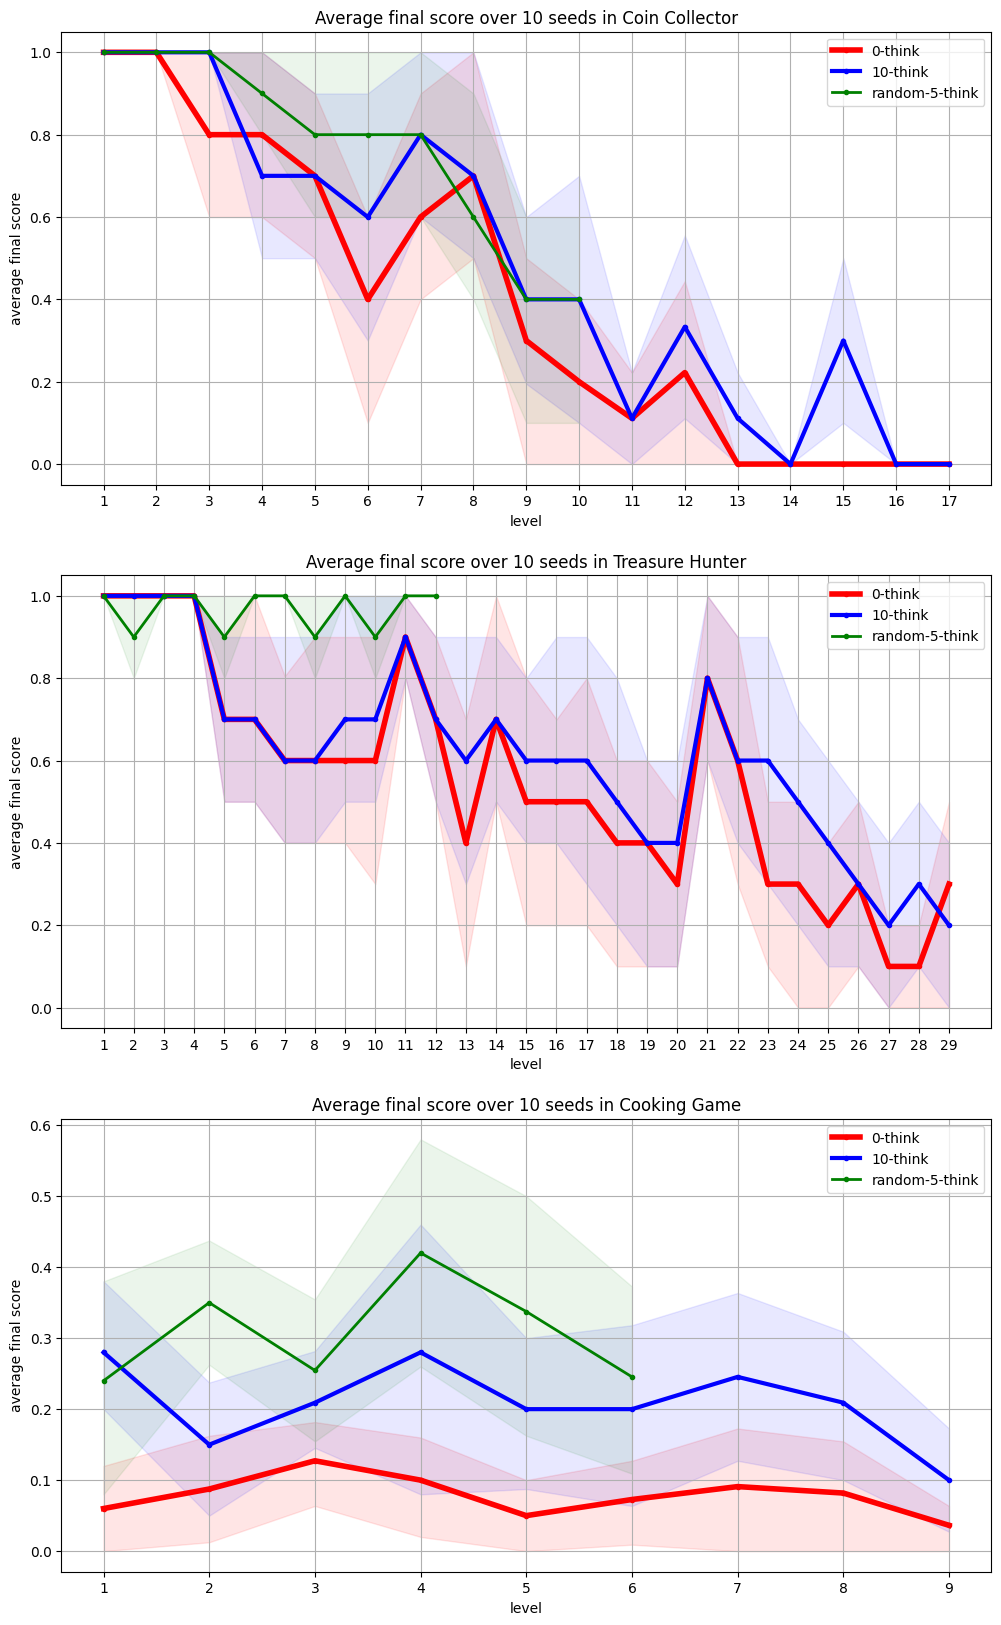

In [15]:
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "treasure_hunter": "Treasure Hunter", "cooking": "Cooking Game"}

for i, game in enumerate(final_arrays.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    y_0, y_0_ci = final_arrays[game][0]
    y_10, y_10_ci = final_arrays[game][10]
    y_r5, y_r5_ci = final_arrays[game]["r5"]

    ax.fill_between(x,
                    np.clip([i[0] for i in y_0_ci], 0, 1),
                    np.clip([i[1] for i in y_0_ci], 0, 1),
                    alpha=0.1, color="red")
    ax.fill_between(x,
                    np.clip([i[0] for i in y_10_ci], 0, 1),
                    np.clip([i[1] for i in y_10_ci], 0, 1),
                    alpha=0.09, color="blue")
    ax.fill_between(x[:len(y_r5_ci)],
                    np.clip([i[0] for i in y_r5_ci], 0, 1),
                    np.clip([i[1] for i in y_r5_ci], 0, 1),
                    alpha=0.08, color="green")

    ax.plot(x, y_0, label="0-think", marker=".", linestyle="-", color="red", linewidth=4)
    ax.plot(x, y_10, label="10-think", marker=".", linestyle="-", color="blue", linewidth=3)
    ax.plot(x[:len(y_r5)], y_r5, label="random-5-think", marker=".", linestyle="-", color="green", linewidth=2)
    
    ax.set_title(f"Average final score over 10 seeds in {prettified_names[game]}")
    ax.set_xlabel('level')
    ax.set_ylabel('average final score')
    ax.legend()

    ax.set_xticks(x)
    # ax.set_ylim(ylims_FM[game][0], ylims_FM[game][1])
    ax.grid()

plt.show()